# Wordcloud("koNLPy"로 작업)

In [ ]:
# koNLPy 설치
pip install pandas konlpy wordcloud matplotlib openpyxl

# jvm 설치 후 확인
import os
print(os.environ.get('JAVA_HOME'))

## 1. 데이터 불러오기

In [44]:
import pandas as pd

# 데이터 불러오기
file_path = 'C:/Users/osbor/OneDrive/바탕 화면/회사생활/오르비스/PlantAI/ICML_Data_Allclaim.xlsx'
df = pd.read_excel(file_path)
df = df.iloc[:, 1:5]
# df = df.iloc[:,3:7]
# df = df.drop(columns="대표청구항")
df.head()

,발명의 명칭,독립항,요약,전체 청구항
0,플랜트 이상 감지 학습 시스템 및 방법(plant fault detection le...,[청구항1]\n플랜트에 대해 플랜트 데이터를 수집하는 데이터 수집부;\n모수성(Pa...,본 발명은 실시간으로 수집한 플랜트 데이터에 대해 서로 다른 특징을 지닌 복수의 예...,[청구항1]\n플랜트에 대해 플랜트 데이터를 수집하는 데이터 수집부;\n모수성(Pa...
1,고장유형에 따른 패턴 분석을 통한 고장 예지 진단시스템 및 방법(failure pr...,"[청구항1]\n오일, 가스 플랜트 설비 고장 예지 시스템에 있어서, \n오일, 가스...",실시예에 따른 고장유형에 따른 패턴 분석을 통한 고장 예지 진단 시스템 및 방법은 ...,"[청구항1]\n오일, 가스 플랜트 설비 고장 예지 시스템에 있어서, \n오일, 가스..."
2,지능형 비엠씨의 센서 데이터 예측을 통한 서버 이상 감지 시스템 및 방법(serve...,[청구항1]\n서버의 메인보드 주변기기(Main Board Peripherals)를...,본 발명의 실시예는 서버의 메인보드 주변기기(Main Board Peripheral...,[청구항1]\n서버의 메인보드 주변기기(Main Board Peripherals)를...
3,"플랜트 이상 감지를 위한 자동 학습 시스템 및 방법(plant system, and...",[청구항1]\n플랜트에 대해 센서 데이터를 수집하는 데이터 수집부;\n상기 수집된 ...,본 발명은 플랜트 고장 감지를 위하여 자동 학습으로 플랜트를 모델링하는 자동 학습 ...,[청구항1]\n플랜트에 대해 센서 데이터를 수집하는 데이터 수집부;\n상기 수집된 ...
4,센서 데이터 융합 기반 iot 기상센서기기 이상감지 방법 및 시스템(method a...,"[청구항1]\n센서 데이터 융합 기반 IoT 기상센서기기 이상감지 방법으로서,\n(...",본 발명은 센서 데이터 융합 기반 IoT 기상센서기기 이상감지 방법 및 시스템에 관...,"[청구항1]\n센서 데이터 융합 기반 IoT 기상센서기기 이상감지 방법으로서,\n(..."


## 2. 전처리 진행

In [47]:
# 분석에 앞서 전처리 진행 (특허 데이터라서 상기, 본, 청구항 및 \n 요런 것들...)
cols = ['발명의 명칭', '독립항', '요약', '전체 청구항']
deleteWords = ['[청구항1]\n', '상기', '\n', ';', '본']
for col in cols:
    for dW in deleteWords:
        df[col] = df[col].str.replace(dW, '', regex=False).str.lstrip().str.strip()

# 데이터프레임에서 행(row) 방향으로 string형태로 하나로 합침
text = df[cols].astype(str).agg(''.join, axis=1)
text

0      플랜트 이상 감지 학습 시스템 및 방법(plant fault detection le...
1      고장유형에 따른 패턴 분석을 통한 고장 예지 진단시스템 및 방법(failure pr...
2      지능형 비엠씨의 센서 데이터 예측을 통한 서버 이상 감지 시스템 및 방법(serve...
3      플랜트 이상 감지를 위한 자동 학습 시스템 및 방법(plant system, and...
4      센서 데이터 융합 기반 iot 기상센서기기 이상감지 방법 및 시스템(method a...
                             ...                        
495    장치 이상 감지 센서(detection sensor)장치의 이상을 감지하는 장치 이...
496    이종 센서 데이터를 동기화 및 저장하는 장치 및 방법(apparatus and me...
497    반도체 제조 설비의 부품 이상 감지 장치(apparatus for detecting...
498    고장 심각도에 기반한 연료전지 시스템의 고장 진단방법(fuel cell system...
499    유전자 알고리즘 기반의 역설계 방법과, 이를 포함하고 인공지능 프로그램이 채용된 컴...
Length: 500, dtype: object

## 3. 형태소 분석 

In [50]:
# 형태소 분석 시작(명사추출)
# 즉, 토큰화 (쉽게 설명하면 문장을 어절, 어간, 어구 등 최소한의 단위로 잘라냄)
from konlpy.tag import Okt
okt = Okt()

lstText = [] # .net으로 치자면 버퍼느낌 ?
for word in text:
    lstText += okt.nouns(str(word))
lstText[:5]

# lstText = ['플랜트', '이상','감지', ... ]

['플랜트', '이상', '감지', '학습', '시스템']

In [52]:
print("토큰화 lst[] 길이: ", len(lstText))

토큰화 lst[] 길이:  515687


## 4. 불용어 제거

In [54]:
# step1. 공식 불용어 사전으로 불용어 제거
import requests

# 1차 공식 불용어 리스트 가져오기
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/master/stopwords-ko.txt"
ko_stopwords = set(requests.get(url).text.splitlines())

firstfilterlstText = []
for noun in lstText:
    if noun not in ko_stopwords and len(noun) > 1: # 만약 명사가 1글자이거나 공식 불용어 사전에 없다면 내가 추출한 데이터 토큰들이
        firstfilterlstText.append(noun)
firstfilterlstText

print("1차 불용어 제거 전: ", len(lstText))
print("1차 불용어 제거 후: ", len(firstfilterlstText))

1차 불용어 제거 전:  515687
1차 불용어 제거 후:  412605


In [56]:
# 1차 불용어 제거 후 단어 빈도 분석
# 데이터를 세는 데 특화된 Counter collection(자료구조)
from collections import Counter

wordFreq = Counter(firstfilterlstText)

# 상위 n개 단어 출력
top_n = 100

# 딕셔너리와 비슷한 형태로 반환하며 내림차순(most_common) 정렬
print(f"<상위 {top_n}개 단어 출력>\n\n", wordFreq.most_common(top_n))

<상위 100개 단어 출력>

 [('데이터', 23005), ('센서', 10188), ('단계', 8072), ('포함', 7415), ('모델', 6169), ('청구', 6126), ('학습', 5351), ('정보', 5310), ('예측', 5269), ('시스템', 4317), ('방법', 4254), ('장치', 4046), ('감지', 3906), ('특징', 3884), ('설비', 3546), ('상태', 3462), ('수집', 3276), ('제어', 3232), ('이용', 3142), ('기반', 2987), ('실시간', 2903), ('모듈', 2785), ('대한', 2765), ('측정', 2743), ('모니터링', 2665), ('분석', 2596), ('복수', 2426), ('입력', 2346), ('처리', 2332), ('통해', 2322), ('저장', 2256), ('설정', 2122), ('고장', 2091), ('러닝', 2079), ('신호', 2035), ('판단', 1979), ('수행', 1976), ('출력', 1969), ('진단', 1828), ('수신', 1800), ('결과', 1796), ('정상', 1655), ('머신', 1642), ('전송', 1628), ('관리', 1557), ('서버', 1517), ('산출', 1485), ('구성', 1420), ('경우', 1361), ('제공', 1349), ('기초', 1312), ('발생', 1288), ('결정', 1199), ('온도', 1186), ('획득', 1173), ('신경망', 1152), ('이미지', 1145), ('태양광', 1114), ('사용자', 1111), ('자동', 1110), ('통신', 1105), ('추출', 1093), ('인공', 1084), ('기준', 1077), ('위치', 1043), ('운전', 1019), ('선택', 1004), ('알고리즘', 967), ('분류', 962), ('발전

In [58]:
# Couter.most_common 즉, 빈도분석을 통하여 내가 보고 직접 판단하여 토큰 소거
# 2차 불용어 제거
secondfilterlstText = []
myStopWords = {'대한', '이용', '기반', '방법', '복수', '특징', '결과', '통해', '제공', '구성', 
               '관리', '기초', '획득', '특정', '적용', '해당', '발명', '관련', '선택', '사용', 
               '경우', '청구', '미리', '위해', '대해', '도출', '신부', '대하', '유형', '정의',
               '확인', '영역', '종류', '로서', '전달', '부가', '부와', '복합', '변경', '연관',
               '포함', '단계', '어망', '서로', '신규', '기법', '내지', '내의', '형성', '제품', 
               '어부', '대응', '기기', '통합', '작업', '대상', '결정', '대응', '연결', '인식',
               '세트', '기간', '실시', '기능', '취득', '과정', '부로', '활용', '시설', '특성',
               '서비스', '성부', '별로', '경우'}

for noun in firstfilterlstText:
    if noun not in myStopWords:
        secondfilterlstText.append(noun)
secondfilterlstText

print("1차 불용어 제거 전: ", len(lstText))
print("1차 불용어 제거 후: ", len(firstfilterlstText))
print("2차 불용어 제거 후: ", len(secondfilterlstText))

1차 불용어 제거 전:  515687
1차 불용어 제거 후:  412605
2차 불용어 제거 후:  334634


In [60]:
# 2차 불용어 제거 후 단어 빈도 분석
from collections import Counter

secondWordfreq = Counter(secondfilterlstText)

# 상위 n개 단어 출력
top_n = 150
print(f"<상위 {top_n}개 단어 출력>\n\n", secondWordfreq.most_common(top_n))  

<상위 150개 단어 출력>

 [('데이터', 23005), ('센서', 10188), ('모델', 6169), ('학습', 5351), ('정보', 5310), ('예측', 5269), ('시스템', 4317), ('장치', 4046), ('감지', 3906), ('설비', 3546), ('상태', 3462), ('수집', 3276), ('제어', 3232), ('실시간', 2903), ('모듈', 2785), ('측정', 2743), ('모니터링', 2665), ('분석', 2596), ('입력', 2346), ('처리', 2332), ('저장', 2256), ('설정', 2122), ('고장', 2091), ('러닝', 2079), ('신호', 2035), ('판단', 1979), ('수행', 1976), ('출력', 1969), ('진단', 1828), ('수신', 1800), ('정상', 1655), ('머신', 1642), ('전송', 1628), ('서버', 1517), ('산출', 1485), ('발생', 1288), ('온도', 1186), ('신경망', 1152), ('이미지', 1145), ('태양광', 1114), ('사용자', 1111), ('자동', 1110), ('통신', 1105), ('추출', 1093), ('인공', 1084), ('기준', 1077), ('위치', 1043), ('운전', 1019), ('알고리즘', 967), ('분류', 962), ('발전', 960), ('프로세서', 957), ('비교', 938), ('동작', 924), ('전력', 921), ('탐지', 895), ('차량', 894), ('삭제', 884), ('환경', 884), ('전류', 878), ('시계열', 868), ('공정', 865), ('전량', 862), ('비정상', 856), ('진동', 847), ('패턴', 795), ('기계', 792), ('변수', 788), ('감시', 779), ('지능', 776), ('벡터',

## 5. 단어 쌍 병합(선택)

In [62]:
# 단어 쌍 병합을 위한 설정
merge_pairs = [
    ("머신", "러닝"),     
    ("딥", "러닝"),       
    ("인공", "지능")
]

# 병합된 단어 사전 생성 (토큰 인덱스 매핑용)
merged_word_map = {}
for first, second in merge_pairs:
    merged_word = f"{first}{second}"
    merged_word_map[(first, second)] = merged_word

# 워드 카운팅을 위한 병합 수행
merged_words = []
i = 0
while i < len(secondfilterlstText):
    merged = False
    
    if i + 1 < len(secondfilterlstText):
        current_pair = (secondfilterlstText[i], secondfilterlstText[i + 1])
        if current_pair in merged_word_map:
            merged_words.append(merged_word_map[current_pair])
            i += 2
            merged = True
    
    if not merged:
        merged_words.append(secondfilterlstText[i])
        i += 1

# 병합된 단어로 빈도 계산
word_freq_merged = Counter(merged_words)

top_n = 150
print(f"<상위 {top_n}개 단어 출력>\n\n", word_freq_merged.most_common(top_n))

<상위 150개 단어 출력>

 [('데이터', 23005), ('센서', 10188), ('모델', 6169), ('학습', 5351), ('정보', 5310), ('예측', 5269), ('시스템', 4317), ('장치', 4046), ('감지', 3906), ('설비', 3546), ('상태', 3462), ('수집', 3276), ('제어', 3232), ('실시간', 2903), ('모듈', 2785), ('측정', 2743), ('모니터링', 2665), ('분석', 2596), ('입력', 2346), ('처리', 2332), ('저장', 2256), ('설정', 2122), ('고장', 2091), ('신호', 2035), ('판단', 1979), ('수행', 1976), ('출력', 1969), ('진단', 1828), ('수신', 1800), ('정상', 1655), ('전송', 1628), ('머신러닝', 1529), ('서버', 1517), ('산출', 1485), ('발생', 1288), ('온도', 1186), ('신경망', 1152), ('이미지', 1145), ('태양광', 1114), ('사용자', 1111), ('자동', 1110), ('통신', 1105), ('추출', 1093), ('기준', 1077), ('위치', 1043), ('운전', 1019), ('알고리즘', 967), ('분류', 962), ('발전', 960), ('프로세서', 957), ('비교', 938), ('동작', 924), ('전력', 921), ('탐지', 895), ('차량', 894), ('삭제', 884), ('환경', 884), ('전류', 878), ('시계열', 868), ('공정', 865), ('전량', 862), ('비정상', 856), ('진동', 847), ('패턴', 795), ('기계', 792), ('변수', 788), ('감시', 779), ('벡터', 775), ('에너지', 769), ('변환', 760), ('컴퓨터

## 6. 시각화(Wordcloud)

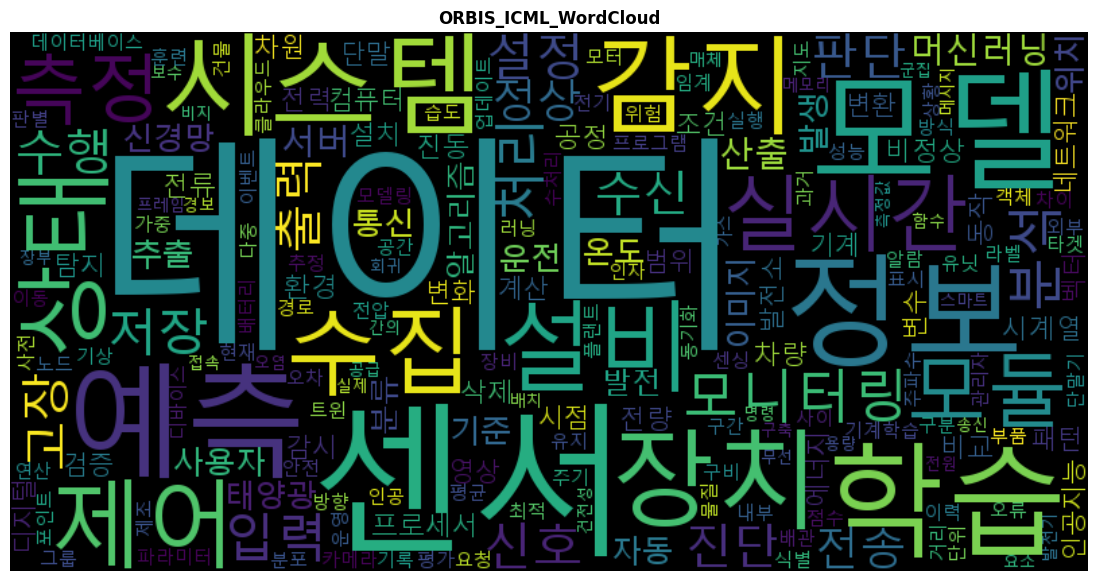

In [64]:
# 워드 클라우드 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# font_path 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Malgun Gothic 경로

# WordCloud 파라미터 Set
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='black'
).generate_from_frequencies(word_freq_merged) # word_freq_merged

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ORBIS_ICML_WordCloud', fontweight = 'bold')
plt.show()

# 토픽모델링_LDA

## 라이브러리 설치

In [ ]:
# pyLDAvis 설치
import sys
!{sys.executable} -m pip install pyLDAvis

## 데이터 전처리

In [66]:
lstText = text.to_list() # 위에 WordCloud에서 String 형태로 만들어 놓은 데이터를 list형태로 변환(토큰화가 아닌 문서화를 위해서)

# 1차, 2차 합쳐줌 (공식 + 커스터마이징)
combined_stopwords = ko_stopwords.union(myStopWords)

# 토큰화 진행한 데이터 필터링(불용어 제거) 작업
texts = []
for doc in lstText:
    tokens = okt.nouns(str(doc))
    tokens = [t for t in tokens if t not in combined_stopwords and len(t) > 1]
    texts.append(tokens)

# texts = [
#   ['플랜트', '이상', '감지'....]
#   ['플랜트', '감지', '자동']
# ]

In [68]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
print("토큰 수: ", len(dictionary.values()))
corpus = [dictionary.doc2bow(text) for text in texts]

토큰 수:  4614


In [ ]:
corpus

## LDA 모델링

In [70]:
# LDA 모델링
from gensim import models 

lda_model = models.LdaModel(
    corpus,
    num_topics=3,          # 찾고 싶은 토픽 개수 지정
    id2word=dictionary,    # 단어 사전
    passes=10,             # 학습 반복 횟수
    random_state=42        # 재현성 확보용 시드값
)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.093*"데이터" + 0.033*"모델" + 0.029*"예측" + 0.027*"학습" + 0.014*"센서" + 0.013*"시스템" + 0.013*"정보" + 0.012*"수집" + 0.012*"러닝" + 0.012*"고장"')
(1, '0.069*"데이터" + 0.055*"센서" + 0.017*"감지" + 0.016*"장치" + 0.015*"학습" + 0.015*"모델" + 0.014*"설비" + 0.013*"상태" + 0.013*"정보" + 0.010*"수집"')
(2, '0.031*"데이터" + 0.025*"센서" + 0.023*"정보" + 0.021*"제어" + 0.019*"실시간" + 0.019*"모니터링" + 0.016*"시스템" + 0.015*"장치" + 0.014*"설비" + 0.012*"상태"')


## LDA 시각화

In [72]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.save_html(vis_data, 'lda_visualization.html')

pyLDAvis.display(vis_data)

In [74]:
file_path = 'C:/Users/osbor/OneDrive/바탕 화면/회사생활/오르비스/PlantAI/ICML_Data_Allclaim.xlsx'
df1 = pd.read_excel(file_path)
df1['출원인'].value_counts().to_frame().head(30)

,count
출원인,
삼성전자주식회사,10
한국전자통신연구원,10
로베르트 보쉬 게엠베하,7
연세대학교 산학협력단,6
한국생산기술연구원,6
한국전자기술연구원,5
한국과학기술연구원,5
두산에너빌리티 주식회사,4
가온플랫폼 주식회사,4
